<a href="https://colab.research.google.com/github/ploydang/emag_acy67/blob/main/66050225_lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/nayot/emag-jupyter/refs/heads/main/pics/lecture_banner.webp)
# LECTURE 07 Application of Gauss' Law

# 514336 Engineering Electromagnetic Field

## Activity 1
**สนามไฟฟ้าเนื่องจากประจุแบบเส้นยาวอนันต์**

ประจุไฟฟ้าแบบเส้นยาวมาก ๆ (เป็นอนันต์) เส้นหนึ่ง วางอยู่บนแกน $z$ ถ้าประจุเส้นนี้ มีความหนาแน่นประจุ $\rho_l=1~\mu\mathrm{C}$ จง plot ขนาดของฟลักซ์ไฟฟ้า $\mathbf{D}$ เมื่อเทียบกับรัศมี $\rho$

In [11]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.constants import pi

def activity_1():
    # YOUR CODE HERE
    rho_l = 1e-6
    rho = np.linspace(-5, 5, 1000)
    D = np.abs(rho_l / (2 * pi * rho))

    plt.figure(figsize=(5, 5))
    plt.plot(rho, D)
    plt.ylim(0, 1e-6)
    return True

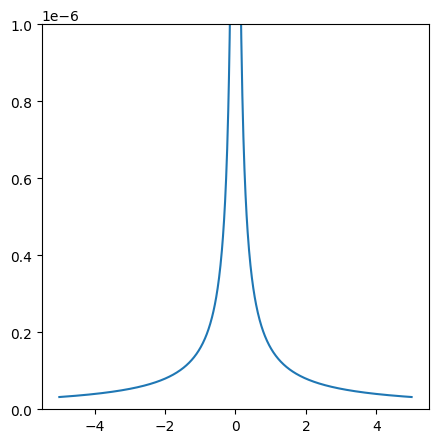

In [12]:
# Checking -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert activity_1()

## Activity 2
**สนามไฟฟ้าเนื่องจากประจุทรงกระบอกยาวอนันต์ที่มีความหนาแน่นประจุสม่ำเสมอ**

ประจุไฟฟ้าแบบเส้นยาวมาก ๆ (เป็นอนันต์) เส้นหนึ่ง วางอยู่บนแกน $z$ ถ้าประจุเส้นนี้ มีความหนาแน่นประจุ $\rho_v=1~\mu\mathrm{C/m^3}$ จง plot ขนาดของฟลักซ์ไฟฟ้า $\mathbf{D}$ เมื่อเทียบกับรัศมี $\rho$

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def activity_2():
    # YOUR CODE HERE
    a = 0.01
    rho_v = 1e-6

    def D(rho):
      if np.abs(rho) > a:
        return rho_v * a**2 / (2 * np.abs(rho))
      else:
        return rho_v * np.abs(rho) / 2

    rho = np.linspace(-0.1, 0.1, 1000)
    Dv = []
    for rh in rho:
      Dv.append(D(rh))

    plt.figure(figsize=(6, 4))
    plt.plot(rho, Dv)

    return True

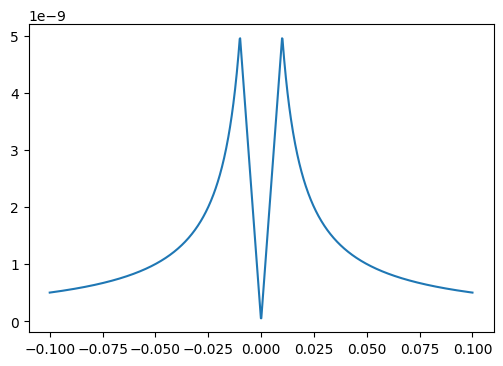

In [10]:
# Checking -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert activity_2()

## Activity 3

**สนามไฟฟ้าเนื่องจากประจุทรงกระบอกยาวอนันต์ที่มีความหนาแน่นประจุ "ไม่" สม่ำเสมอ**

ประจุไฟฟ้าแบบเส้นยาวมาก ๆ (เป็นอนันต์) เส้นหนึ่ง วางอยู่บนแกน $z$ ถ้าประจุเส้นนี้ มีความหนาแน่นประจุ $\rho_v=\rho_0\exp(\frac{-10\rho}{a})~\mu\mathrm{C/m^3}$ เมื่อ $\rho_0=10\times 10^{-6}$ และ รัศมีของกระบอกประจุ $a=5~\mathrm{mm}$ จง plot ขนาดของฟลักซ์ไฟฟ้า $\mathbf{D}$ เมื่อเทียบกับรัศมี $\rho$

In [16]:
import matplotlib.pyplot as plt
import sympy as smp
import numpy as np

def activity_3():
    # YOUR CODE HERE
    rho = smp.symbols('rho', real=True, positive=True)
    a = 5e-3
    rho_0 = 10e-6

    integrand = rho * smp.exp(-10 * rho / a)

    D = rho_0 / rho * smp.integrate(integrand, [rho, 0, rho])

    D_func = smp.lambdify(rho, D)

    rh = np.linspace(-5e-3, 5e-3, 1000)
    Dv = D_func(np.abs(rh))

    plt.figure(figsize=(6, 4))
    plt.plot(rh, Dv)

    return True

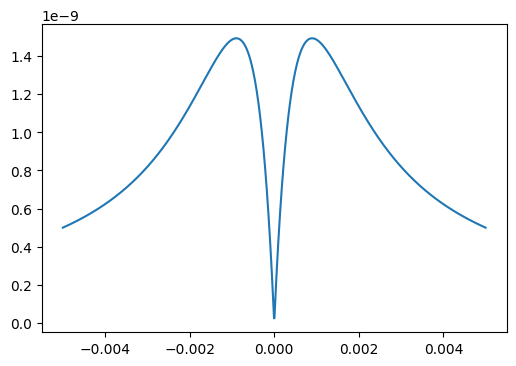

In [17]:
# Checking -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert activity_3()

## Activity 4
**สนามไฟฟ้าเนื่องจากประจุแบบแกนร่วม (Coaxial Charge)**

ประจุแบบแกนร่วมรูปทรงกระบอกเส้นหนึ่งที่มีความยาว $L$ มีประจุตัวในและตัวนอกเท่ากับ $+10~\mu\mathrm{C}$ และ $-10~\mu\mathrm{C}$ ตามลำดับ หากรัศมีของกระบอกประจุตัวใน $a=5~\mathrm{mm}$ และของประจุตัวนอก $b=20~\mathrm{mm}$ จง plot ขนาดของฟลักซ์ไฟฟ้า $\mathbf{D}$ เมื่อเทียบกับรัศมี $\rho$

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def activity_4():
    # YOUR CODE HERE
    Q = 10e-6
    L = 1.0

    def D(rho):
      a = 5e-3
      b = 20e-3
      if 0.0 <= rho < a:
        return rho * Q / (2 * pi * L * a**2)
      elif a <= rho < b:
        return Q / (2 * pi * rho * L)
      else:
        return 0.0

    rho = np.linspace(0, 50e-3, 1000)
    Dv = [D(rho_v) for rho_v in rho]


    plt.plot(rho, Dv)
    return True

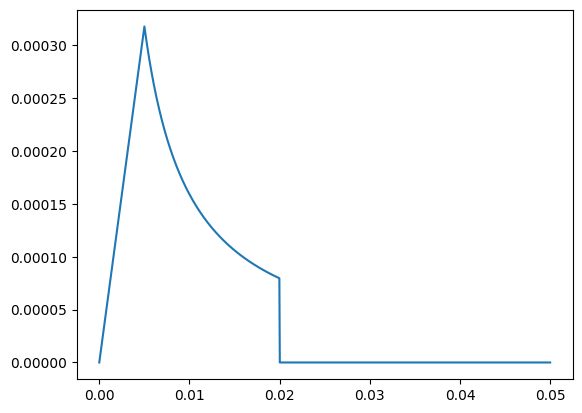

In [22]:
# Checking -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert activity_4()